In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета

In [105]:
data = pd.read_csv('Харовсклеспром_data.csv', index_col=0, parse_dates=['Date'])
data.head()

,Date,Time,Usage_kWh
0,2017-01-01,00 - 01,570.685479
1,2017-01-01,01 - 02,604.642705
2,2017-01-01,02 - 03,518.732113
3,2017-01-01,03 - 04,608.188829
4,2017-01-01,04 - 05,714.140572


In [106]:
# словари и цвета

month_dict = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}
month_list = list(month_dict.values())
colors3 = sns.color_palette("bright", n_colors=3)
colors31 = sns.color_palette("bright", n_colors=31)
colors24 = sns.color_palette("bright", n_colors=24)
colors12 = sns.color_palette("bright", n_colors=12)

In [107]:
data.describe()

,Usage_kWh
count,35064.000000
mean,917.634664
std,355.419642
min,238.525049
25%,609.685837
50%,865.619898
75%,1181.648661
max,2302.898062


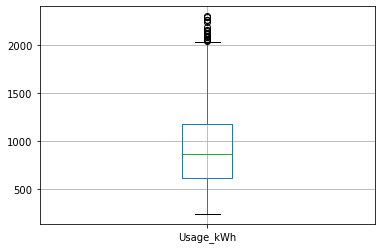

In [108]:
data.boxplot();

In [148]:
a = 865.619898 + 1.5*(1181.648661-609.685837)
print(a)
box_anomaly = list(data[data.Usage_kWh > a].index)
len(box_anomaly)

1723.564134


103

In [110]:
anomaly = []
s = np.std(data.Usage_kWh)
y = list(data.Usage_kWh)
for i in range(1, len(y)):
    lamb = abs(y[i]-y[i-1]) / s
    if lamb > 1:
        anomaly.append(i)
len(anomaly)

5545

In [111]:
index = set(anomaly)&set(box_anomaly)
print(len(index))
for i in index:
    data.loc[i, 'Usage_kWh'] = (data.loc[i-1, 'Usage_kWh'] + data.loc[i+1, 'Usage_kWh']) / 2

315


In [113]:
data.to_csv('Харовсклеспром_data.csv')

In [114]:
print(f'Количество строк: {data.shape[0]}\nКоличество столбцов: {data.shape[1]}')
data_dict = {'Тип':data.dtypes,
             'Количество Nan':data.isnull().sum(),
             'Количество уникальных':[data[i].unique().shape[0] for i in data.columns],
             'Уникальные значения':[data[i].unique() for i in data.columns]}
df_descriptive_statistics = pd.DataFrame.from_dict(data_dict,
                                                   orient='columns')
df_descriptive_statistics

Количество строк: 35064
Количество столбцов: 3


,Тип,Количество Nan,Количество уникальных,Уникальные значения
Date,datetime64[ns],0,1461,"[2017-01-01T00:00:00.000000000, 2017-01-02T00:..."
Time,object,0,24,"[00 - 01, 01 - 02, 02 - 03, 03 - 04, 04 - 05, ..."
Usage_kWh,float64,0,35063,"[570.6854791729655, 604.6427047280158, 518.732..."


In [115]:
pivot_table = data.pivot_table(
    values='Usage_kWh', # столбец со значениями
    index=data['Date'].dt.month_name(), # индексы - названия месяцев
    columns=data['Date'].dt.year, # столбцы - года
    aggfunc=sum # функция агрегации - сумма
)

month_rus_eng = {
    'Январь': 'January',
    'Февраль': 'February',
    'Март': 'March',
    'Апрель': 'April',
    'Май': 'May',
    'Июнь': 'June',
    'Июль': 'July',
    'Август': 'August',
    'Сентябрь': 'September',
    'Октябрь': 'October',
    'Ноябрь': 'November',
    'Декабрь': 'December'
}

month_eng_rus = {v:k for k,v, in month_rus_eng.items()}

pivot_table = pivot_table.rename(index=month_eng_rus)
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
               'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# переупорядочивание строк в соответствии с порядком месяцев
pivot_table = pivot_table.reindex(month_order)

# вывод результата
pivot_table

Date,2017,2018,2019,2020
Date,,,,
Январь,696001.755122,673951.203464,696908.079767,686256.250946
Февраль,692799.658480,653406.433536,685602.748296,705866.854918
Март,711565.663370,704804.157488,712837.045534,696915.954211
Апрель,650426.291738,666677.789860,665585.245607,652500.374791
Май,658978.135645,667757.571437,676875.498834,669100.453708
Июнь,631366.874606,638942.483657,651948.123480,638228.507977
Июль,651980.750452,659963.374174,651510.831128,653917.810317
Август,643031.811534,657615.295420,664922.915620,644249.844558
Сентябрь,631349.904976,642595.336807,650655.524402,626133.641643


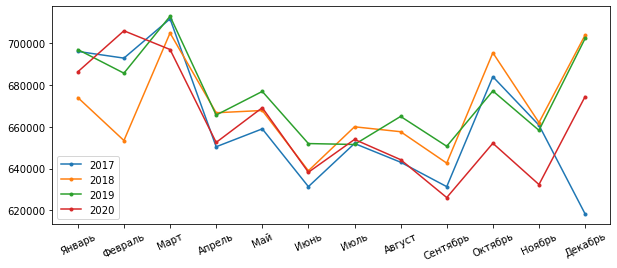

In [116]:
plt.figure(figsize=(10, 4))
for year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[year], label=str(year), marker='.')

# добавление легенды к графику
plt.legend()

# установка делений по оси X соответствующими названиями месяцев
plt.xticks(range(0, 12), pivot_table.index, rotation=25);

# Общая картина

In [117]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Winter'] = [1 if month in [1,2,12] else 0 for month in data.Month]

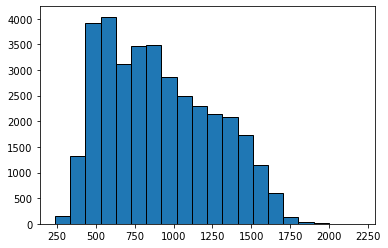

In [121]:
plt.hist(data.Usage_kWh, edgecolor = 'black', bins=20);

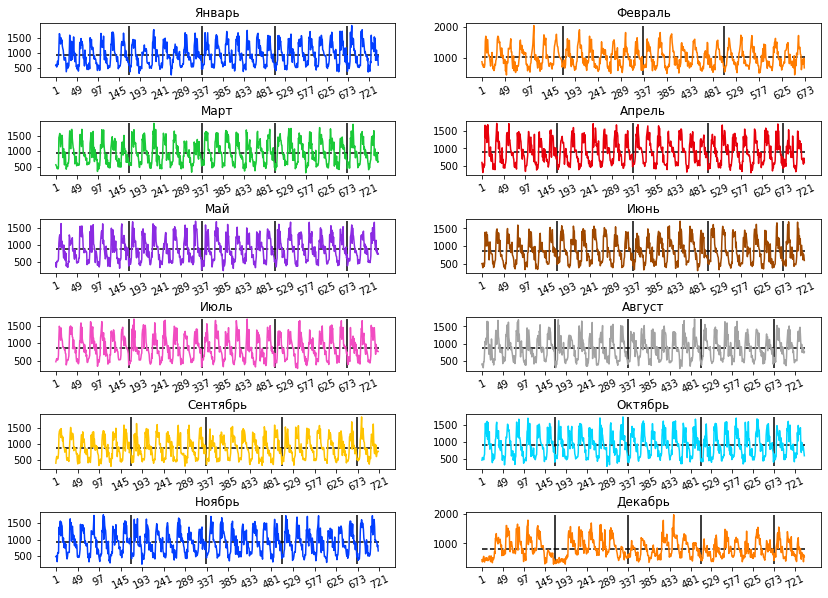

In [130]:
plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.8) 

df_2017 = data[data['Year'] == 2017] 
c = 1
for key, value in month_dict.items():
    plt.subplot(6,2,c)
    energy = df_2017[df_2017['Month'] == key]['Usage_kWh'].values
    plt.plot(energy, color=colors12[c-1])
    plt.hlines(y=np.mean(energy), xmin=1, xmax=len(energy), color='black', linestyle='dashed')
    w = 168
    while w < len(energy):
        plt.vlines(x=w, ymin=min(energy), ymax=max(energy), color='black')
        w += 168
    plt.xticks(np.arange(1, len(energy)+2, 48), rotation=25)
    plt.title(value)
    c += 1

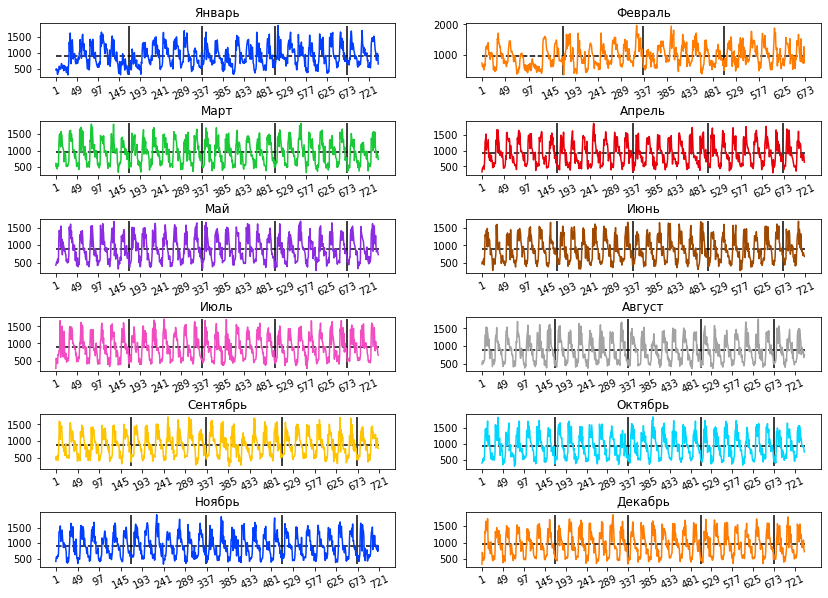

In [131]:
plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.8) 

df_2018 = data[data['Year'] == 2018] 
c = 1
for key, value in month_dict.items():
    plt.subplot(6,2,c)
    energy = df_2018[df_2018['Month'] == key]['Usage_kWh'].values
    plt.plot(energy, color=colors12[c-1])
    plt.hlines(y=np.mean(energy), xmin=1, xmax=len(energy), color='black', linestyle='dashed')
    w = 168
    while w < len(energy):
        plt.vlines(x=w, ymin=min(energy), ymax=max(energy), color='black')
        w += 168
    plt.xticks(np.arange(1, len(energy)+2, 48), rotation=25)
    plt.title(value)
    c += 1

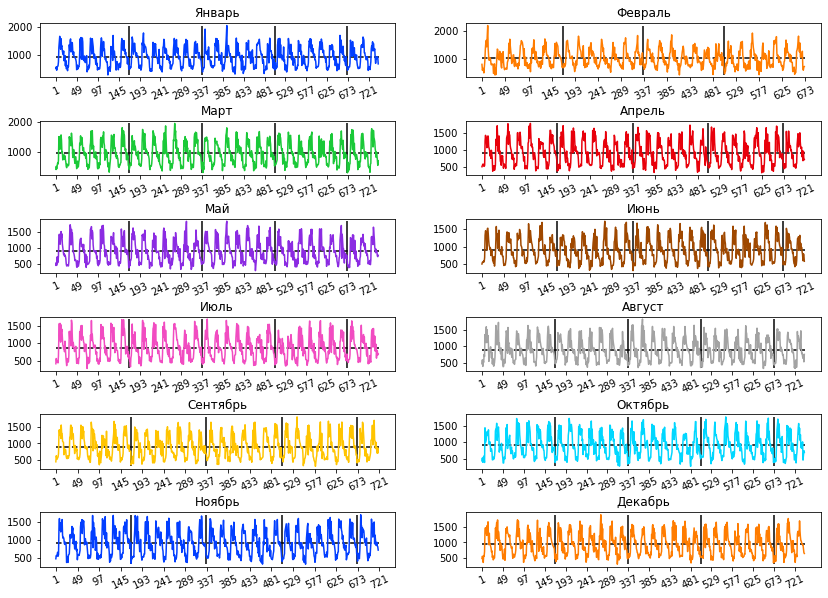

In [132]:
plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.8) 

df_2019 = data[data['Year'] == 2019] 
c = 1
for key, value in month_dict.items():
    plt.subplot(6,2,c)
    energy = df_2019[df_2019['Month'] == key]['Usage_kWh'].values
    plt.plot(energy, color=colors12[c-1])
    plt.hlines(y=np.mean(energy), xmin=1, xmax=len(energy), color='black', linestyle='dashed')
    w = 168
    while w < len(energy):
        plt.vlines(x=w, ymin=min(energy), ymax=max(energy), color='black')
        w += 168
    plt.xticks(np.arange(1, len(energy)+2, 48), rotation=25)
    plt.title(value)
    c += 1

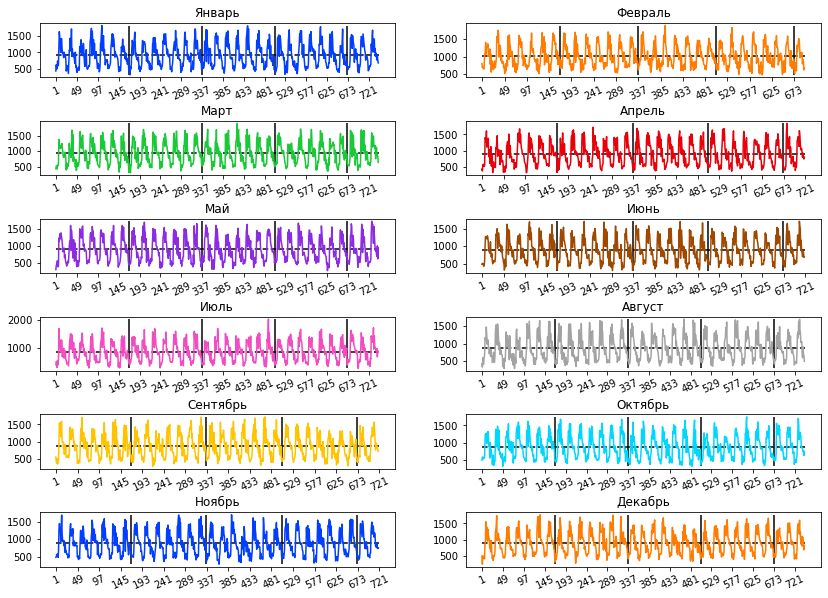

In [133]:
plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.8) 

df_2020 = data[data['Year'] == 2020] 
c = 1
for key, value in month_dict.items():
    plt.subplot(6,2,c)
    energy = df_2020[df_2020['Month'] == key]['Usage_kWh'].values
    plt.plot(energy, color=colors12[c-1])
    plt.hlines(y=np.mean(energy), xmin=1, xmax=len(energy), color='black', linestyle='dashed')
    w = 168
    while w < len(energy):
        plt.vlines(x=w, ymin=min(energy), ymax=max(energy), color='black')
        w += 168
    plt.xticks(np.arange(1, len(energy)+2, 48), rotation=25)
    plt.title(value)
    c += 1

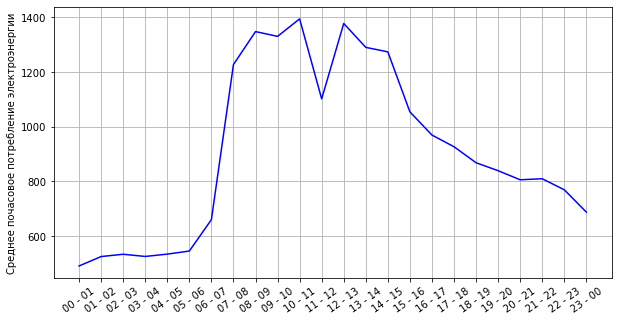

In [134]:
day_energy = data.groupby(['Time'])['Usage_kWh'].mean()
plt.figure(figsize=(10, 5))
plt.plot(day_energy, color='blue')
plt.xticks(day_energy.index, rotation=35)
plt.ylabel('Среднее почасовое потребление электроэнергии')
plt.grid();

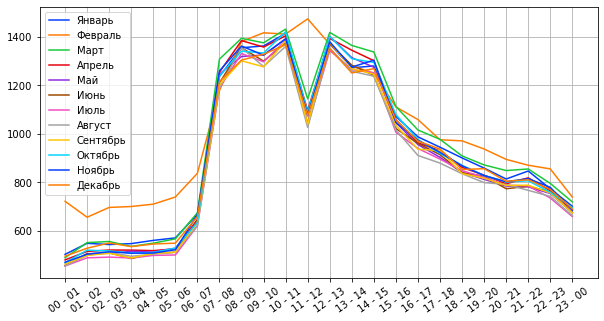

In [135]:
plt.figure(figsize=(10, 5))
c = 0 
for key, value in month_dict.items():
    month = data[data['Month'] == key]
    energy = month.groupby(['Time'])['Usage_kWh'].mean()
    plt.plot(energy, color=colors24[c], label = value)
    plt.xticks(energy.index, rotation=35)
    c += 1
plt.grid()
plt.legend();

In [166]:
holidays = ['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
            '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
            '2017-02-23', '2017-02-24', '2017-03-08', '2017-05-01', '2017-5-09',
            '2017-06-12', '2017-11-04',
            
            '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
            '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
            '2018-02-23', '2018-02-24', '2018-02-25',
            '2018-03-08', '2018-03-09','2018-03-10','2018-03-11',
            '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
            '2018-04-30','2018-05-01', '2018-05-02', '2018-05-09',
            '2018-06-10', '2018-06-11', '2018-06-12', '2018-11-03', '2018-11-04', '2018-11-05',
           
            '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
            '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
            '2019-02-23', '2019-03-08', '2019-05-01', '2019-5-09',
            '2019-06-12', '2019-11-04',
            
            '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
            '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
            '2020-02-23', '2020-03-08', '2020-05-01', '2020-5-09',
            '2020-06-12', '2020-11-04']

holidays = pd.to_datetime(holidays)

In [168]:
sat_sun = []
for index, row in data.iterrows():
    if row.DayOfWeek == 7  or row.DayOfWeek == 6 or row.Date in holidays:
        sat_sun.append(1)
    else:
        sat_sun.append(0)
data['Weekend'] = sat_sun 

In [151]:
peak = []
for index, row in data.iterrows():
    if row.Time in ['06 - 07', '07 - 08', '08 - 09', '09 - 10', '10 - 11', '11 - 12', '12 - 13', '13 - 14']:
        peak.append(1)
    else:
        peak.append(0)
data['Peak'] = peak

In [242]:
peak_months = []
for index, row in data.iterrows():
    if row.Month in [1, 2, 3, 9, 10, 11, 12]:
        peak_months.append(1)
    else:
        peak_months.append(0)
data['Peak_month'] = peak_months

In [172]:
data['Year2017'] = [1 if row.Year == 2017 else 0 for index, row in data.iterrows()]
data['Year2018'] = [1 if row.Year == 2018 else 0 for index, row in data.iterrows()]
data['Year2019'] = [1 if row.Year == 2019 else 0 for index, row in data.iterrows()]

In [177]:
import calendar
year_month = pd.DataFrame(None)
year_month['2017'] = [calendar.monthrange(2017, month)[1] for month in range(1, 13)]
year_month['2018'] = [calendar.monthrange(2018, month)[1] for month in range(1, 13)]
year_month['2019'] = [calendar.monthrange(2019, month)[1] for month in range(1, 13)]
year_month['2020'] = [calendar.monthrange(2020, month)[1] for month in range(1, 13)]
year_month

,2017,2018,2019,2020
0,31,31,31,31
1,28,28,28,29
2,31,31,31,31
3,30,30,30,30
4,31,31,31,31
5,30,30,30,30
6,31,31,31,31
7,31,31,31,31
8,30,30,30,30
9,31,31,31,31


In [186]:
days_in_month = [year_month[str(row.Year)][row.Month-1] for ind, row in data.iterrows()]
data['Days_in_month'] = days_in_month

In [191]:
pivot_table = data.pivot_table(
    values='Usage_kWh', # столбец со значениями
    index=data['Date'].dt.month, # индексы - названия месяцев
    columns=data['Date'].dt.year, # столбцы - года
    aggfunc=np.mean # функция агрегации - сумма
)
pivot_table

Date,2017,2018,2019,2020
Date,,,,
1,935.486230,905.848392,936.704408,922.387434
2,1030.951873,972.331002,1020.242185,1014.176516
3,956.405462,947.317416,958.114309,936.714992
4,903.369850,925.941375,924.423952,906.250521
5,885.723301,897.523618,909.778896,899.328567
6,876.898437,887.420116,905.483505,886.428483
7,876.318213,887.047546,875.686601,878.921788
8,864.290069,883.891526,893.713596,865.927210
9,876.874868,892.493523,903.688228,869.630058


In [192]:
pivot_table[2017][1]

935.4862300026613

In [194]:
month_mean = [pivot_table[row.Year][row.Month] for ind, row in data.iterrows()]
data['Month_mean'] = month_mean

In [208]:
year_ = data.groupby('Year')['Usage_kWh'].mean()

In [210]:
year_mean = [year_[row.Year] for ind, row in data.iterrows()]
data['Year_mean'] = year_mean 

In [236]:
meteo = pd.read_csv('meteo_data.txt',
                    delimiter='\t', header=None,
                    names=['temperature', 'humidity', 'wind_speed', 'clear', 'cloudy', 'overcast', 'rain', 'snow'])

t_list = []
h_list = []
w_list = []
for ind, row in meteo.iterrows():
    t = row.temperature.replace('°С', '')
    t = t.replace('−', '-')
    t = t.replace('+', '')
    t_list.append(float(t))
    
    h = row.humidity.replace(' %', '')
    h_list.append(int(h))
    
    w = row.wind_speed.replace(' м/с', '')
    w_list.append(w)
    
meteo['temperature'] = t_list
meteo['humidity'] = h_list
meteo['wind_speed'] = w_list

month_dict_ = {v:k for k, v in month_dict.items()}

meteo = meteo.rename(index=month_dict_)

meteo

,temperature,humidity,wind_speed,clear,cloudy,overcast,rain,snow
1,-9.0,86,3.6,2,20,6,1,1
2,-6.3,84,3.5,2,19,6,2,1
3,-2.2,78,3.4,7,17,4,2,1
4,3.9,67,3.2,9,15,4,2,0
5,10.8,62,3.2,10,15,4,1,0
6,15.8,64,2.9,12,14,3,0,0
7,17.7,74,2.5,9,17,3,0,0
8,16.2,76,2.7,11,16,2,1,0
9,9.8,84,3.1,7,17,5,1,0
10,3.8,85,3.4,5,18,5,1,1


In [238]:
t = [meteo['temperature'][row.Month] for ind, row in data.iterrows()]
data['temperature'] = t 

t = [meteo['humidity'][row.Month] for ind, row in data.iterrows()]
data['humidity'] = t 

t = [meteo['wind_speed'][row.Month] for ind, row in data.iterrows()]
data['wind_speed'] = t 

t = [meteo['clear'][row.Month] for ind, row in data.iterrows()]
data['clear'] = t 

t = [meteo['cloudy'][row.Month] for ind, row in data.iterrows()]
data['cloudy'] = t 

t = [meteo['overcast'][row.Month] for ind, row in data.iterrows()]
data['overcast'] = t 

t = [meteo['rain'][row.Month] for ind, row in data.iterrows()]
data['rain'] = t 

t = [meteo['snow'][row.Month] for ind, row in data.iterrows()]
data['snow'] = t 

In [239]:
data.head()

,Date,Time,Usage_kWh,Year,Month,Day,DayOfWeek,Winter,Weekend,Peak,...,Month_mean,Year_mean,temperature,humidity,wind_speed,clear,cloudy,overcast,rain,snow
0,2017-01-01,00 - 01,570.685479,2017,1,1,6,1,1,0,...,935.48623,905.306678,-9.0,86,3.6,2,20,6,1,1
1,2017-01-01,01 - 02,604.642705,2017,1,1,6,1,1,0,...,935.48623,905.306678,-9.0,86,3.6,2,20,6,1,1
2,2017-01-01,02 - 03,518.732113,2017,1,1,6,1,1,0,...,935.48623,905.306678,-9.0,86,3.6,2,20,6,1,1
3,2017-01-01,03 - 04,608.188829,2017,1,1,6,1,1,0,...,935.48623,905.306678,-9.0,86,3.6,2,20,6,1,1
4,2017-01-01,04 - 05,714.140572,2017,1,1,6,1,1,0,...,935.48623,905.306678,-9.0,86,3.6,2,20,6,1,1


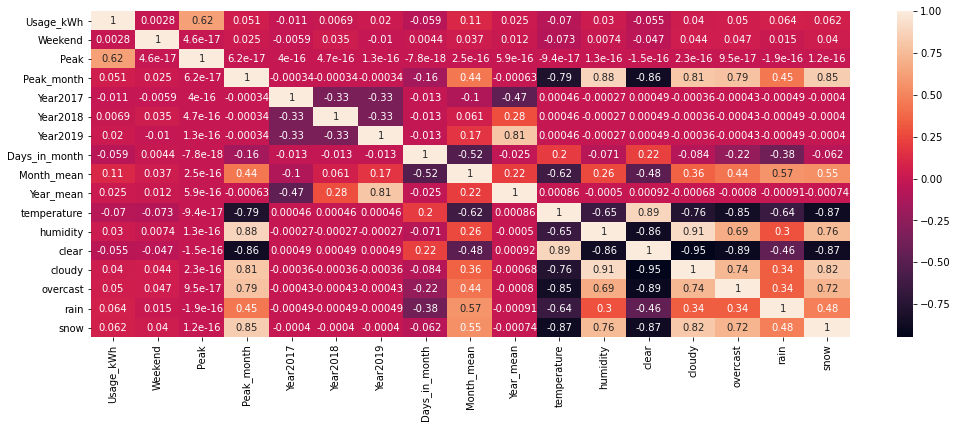

In [243]:
plt.figure(figsize=(17, 6))
corr_matrix = data.drop(['Year', 'Month', 'Day', 'DayOfWeek', 'Winter'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True);